In [1]:
import pandas as pd # dataframes
## from io import StringIO # string to data frame
import seaborn as sns # plotting
import re
import matplotlib.pyplot as plt
import numpy as np


In [75]:
def xtab(*cols, apply_wt=True):
  '''
  source: https://gist.github.com/alexland/d6d64d3f634895b9dc8e
  returns:
    (i) xt, NumPy array storing the xtab results, number of dimensions is equal to 
        the len(args) passed in
    (ii) unique_vals_all_cols, a tuple of 1D NumPy array for each dimension 
        in xt (for a 2D xtab, the tuple comprises the row and column headers)
    pass in:
      (i) 1 or more 1D NumPy arrays of integers
      (ii) if wts is True, then the last array in cols is an array of weights
      
  if return_inverse=True, then NP.unique also returns an integer index 
  (from 0, & of same len as array passed in) such that, uniq_vals[idx] gives the original array passed in
  higher dimensional cross tabulations are supported (eg, 2D & 3D)
  cross tabulation on two variables (columns):
  >>> q1 = NP.array([7, 8, 8, 8, 5, 6, 4, 6, 6, 8, 4, 6, 6, 6, 6, 8, 8, 5, 8, 6])
  >>> q2 = NP.array([6, 4, 6, 4, 8, 8, 4, 8, 7, 4, 4, 8, 8, 7, 5, 4, 8, 4, 4, 4])
  >>> uv, xt = xtab(q1, q2)
  >>> uv
    (array([4, 5, 6, 7, 8]), array([4, 5, 6, 7, 8]))
  >>> xt
    array([[2, 0, 0, 0, 0],
           [1, 0, 0, 0, 1],
           [1, 1, 0, 2, 4],
           [0, 0, 1, 0, 0],
           [5, 0, 1, 0, 1]], dtype=uint64)
    '''
  if not all(len(col) == len(cols[0]) for col in cols[1:]):
    raise ValueError("all arguments must be same size")

  if len(cols) == 0:
    raise TypeError("xtab() requires at least one argument")

  fnx1 = lambda q: len(q.squeeze().shape)
  if not all([fnx1(col) == 1 for col in cols]):
    raise ValueError("all input arrays must be 1D")

  if apply_wt:
    cols, wt = cols[:-1], cols[-1]
  else:
    wt = 1

  uniq_vals_all_cols, idx = zip( *(np.unique(col, return_inverse=True) for col in cols) )
  shape_xt = [uniq_vals_col.size for uniq_vals_col in uniq_vals_all_cols]
  dtype_xt = 'float' if apply_wt else 'uint'
  xt = np.zeros(shape_xt, dtype=dtype_xt)
  np.add.at(xt, idx, wt)
  return uniq_vals_all_cols, xt

In [85]:
#data = pd.read_csv("winners_ep2019.csv")
#data = pd.read_csv("winners_pi2017.csv")
#data = pd.read_csv("winners_mi2019os.csv")
#data = pd.read_csv("winners_mi2015os.csv")
#data = pd.read_csv("pvnr2016-tur2-radev.csv")
data = pd.read_csv("pvnr2016-tur2-gerb.csv")



 Optionally filter for a particular participant 

In [66]:
#print(data.election_party_label.unique())

In [ ]:
#data = data[data.election_party_label == 'ПП ГЕРБ']

[Text(159.0, 0.5, 'Winner Ratio'),
 Text(0.5, 256.19999999999993, 'Turnover'),
 Text(0.5, 1.0, 'Heatmap')]

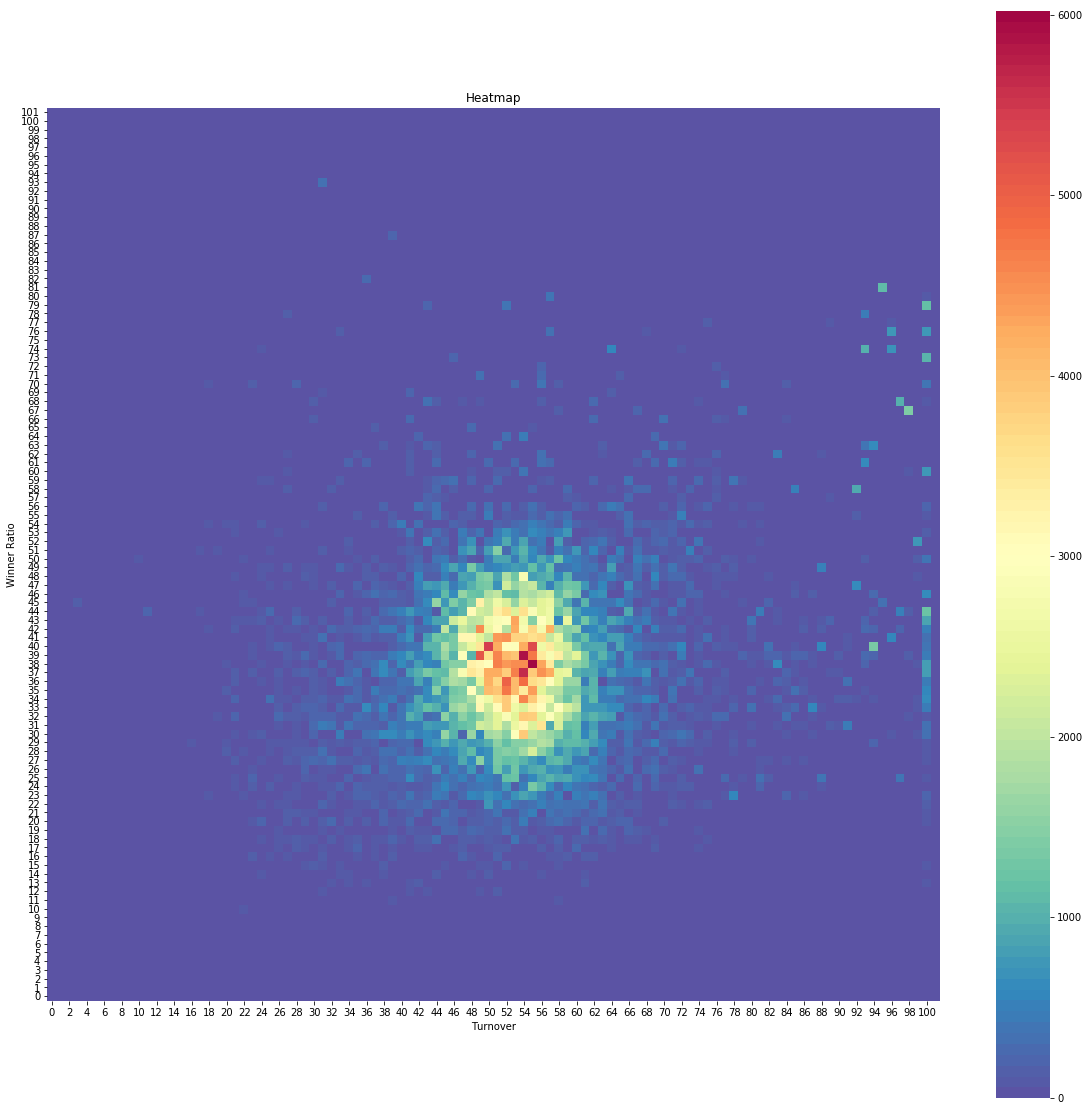

In [86]:

required_data = data[["section_label","vote_ratio_party","voter_turnover","vote_party"]]

voter_turnover = np.rint(required_data.voter_turnover).to_numpy()
vote_ratio_party = np.rint(required_data.vote_ratio_party).to_numpy()
vote_party = required_data.vote_party.to_numpy()

uv, xt = xtab(vote_ratio_party,voter_turnover,vote_party)
co_mat = np.zeros((102,102))
for i,v in enumerate(uv[0]):
    for j,w in enumerate(uv[1]):
        co_mat[int(v)][int(w)] = xt[i][j] 
        
plt.figure(figsize=(20,20))

cm = sns.color_palette("Spectral_r",n_colors=100)
#cm = sns.diverging_palette(250, 10, n=100)
heatmap = sns.heatmap(co_mat, annot=False, square=True, cmap=cm)
heatmap.invert_yaxis()
heatmap.set(title="Heatmap",
      xlabel="Turnover",
      ylabel="Winner Ratio")        